# Data Preparation and analysis 
# project 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df["price_usd"] = df.selling_price.apply(lambda x : x * 0.012) # convert to price in $USD using conversion rate from 9:59 4/4/2024
df.price_usd

0         720.000
1        1620.000
2        7200.000
3        3000.000
4        5400.000
          ...    
4335     4919.988
4336     4919.988
4337     1320.000
4338    10380.000
4339     2700.000
Name: price_usd, Length: 4340, dtype: float64

In [5]:
df.describe()

,year,selling_price,km_driven,price_usd
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,6049.527741
std,4.215344,5.785487e+05,46644.102194,6942.584834
min,1992.000000,2.000000e+04,1.000000,240.000000
25%,2011.000000,2.087498e+05,35000.000000,2504.997000
50%,2014.000000,3.500000e+05,60000.000000,4200.000000
75%,2016.000000,6.000000e+05,90000.000000,7200.000000
max,2020.000000,8.900000e+06,806599.000000,106800.000000


In [6]:
df["base_model"] = df.name.apply(lambda x : x.split(' ')[0])
df['base_model']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: base_model, Length: 4340, dtype: object

In [7]:
df.shape

(4340, 10)

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'price_usd', 'base_model'],
      dtype='object')

# Exploring Year Variable

The first step to exploring the "year" variable in the dataset is to decode the cryptic variable description: "Year of the car when it was bought".

This could mean:

1. The "model year" of the car, which would not change based on when it was bought.

2. The year of the sale, which would change when it was bought. 

### Year - Initial Exploration

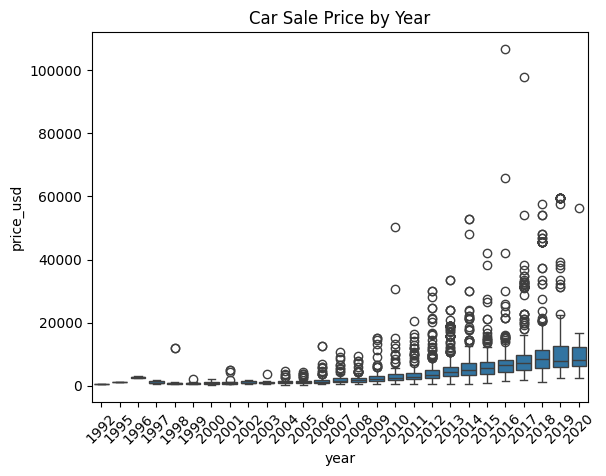

In [9]:
p = sns.boxplot(x='year',y='price_usd', data=df)
plt.xticks(rotation=45)
trash = p.set_title('Car Sale Price by Year')


In [10]:
df.groupby(['year'])['price_usd'].mean()

year
1992      600.000000
1995     1140.000000
1996     2700.000000
1997     1116.000000
1998     2568.000000
1999      882.000000
2000      978.000000
2001     1411.798800
2002     1088.571429
2003     1038.782609
2004     1460.999714
2005     1308.156282
2006     1893.599345
2007     1953.940209
2008     2090.415972
2009     2754.776829
2010     3236.137538
2011     3523.659985
2012     4459.546236
2013     5817.612155
2014     6278.778768
2015     6347.315458
2016     7300.369109
2017     9226.918069
2018    10929.245508
2019    12708.245785
2020     9821.749500
Name: price_usd, dtype: float64

By plotting and aggregating the spread of the sale price by year, we can see that this variable is almost certainly the *model year* -- meaning that the sale price is reflecting the *age* of the car, not *when* the car was sold. 

If the "year" variable was actually referring to the sale date of the car, it would imply that the car sales in the Car Dekho platform had gone up ~10x in price over 18 years, which seems implausible. 

### Year - Center

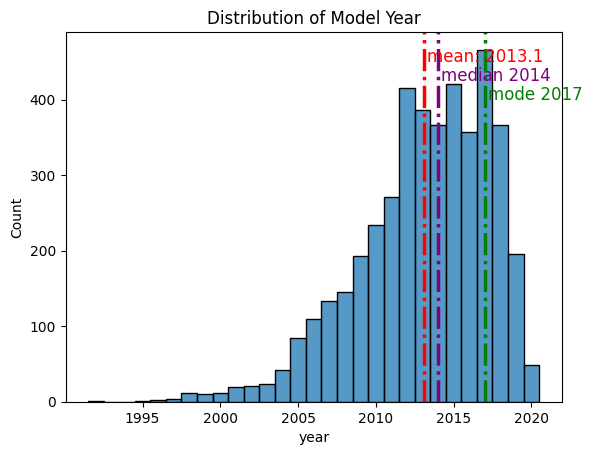

In [11]:
mode = df["year"].mode()[0]
mean = df["year"].mean()
median = df["year"].median()

p = sns.histplot(data=df,x="year",binwidth=1, binrange=(1991.5,2020.5))
plt.axvline(mean, c= "red", lw =2.5,ls ='-.')
plt.text(mean+.2,450,"mean: " + str(round(mean,1)),c="red",fontsize=12)

plt.axvline(median, c= "purple", lw =2.5,ls ='-.')
plt.text(median+.2,425,"median " + str(round(median)),c="purple",fontsize=12)

plt.axvline(mode, c= "green", lw =2.5,ls ='-.')
plt.text(mode+.2,400,"mode " + str(round(mode)),c="green",fontsize=12)
trash = p.set_title("Distribution of Model Year")

The year has a mean of 2013.1, a median of 2014, and a mode of 2017.

### Year - Spread

In [12]:
df["year"].std()

4.215343939724197

The spread of the year variable is 2020 - 1992 = 28 and the standard deviation of the year distribution is 4.2. The distribution itself can be examined above.

### Year - Skew
The year variable is left skewed and does not appear to be normally distributed. The distribution itself can be examined above.

### Year - Clusters/Modality
I would call this distribution unimodal with a mode of 2017, but it does have spikes in 2012 and 2015 that could be explained if there were a lot of cars produced in those years. The distribution itself can be examined above.

### Year - Extreme Values

In [13]:
IQR = np.quantile(df["year"], 0.75) - np.quantile(df["year"], 0.25)
print(IQR*1.5)

df.shape
df[(df["year"] <= 2004)].shape

df[(df["year"] <= 2004)].shape[0] / df.shape[0]


7.5


0.03387096774193549

Given a standard deviation of 4.2, there would be no outliers to the right side of the distribution, since the max year is 2020, which is less than 2013.1 + 4.2*2. 

However, there would be plently of outliers to the left side of the distribution, which would encompass all years 2004 and under (2013.1 - 4.2*2 = 2004.7). This would amount to 3.3% of the total observations.

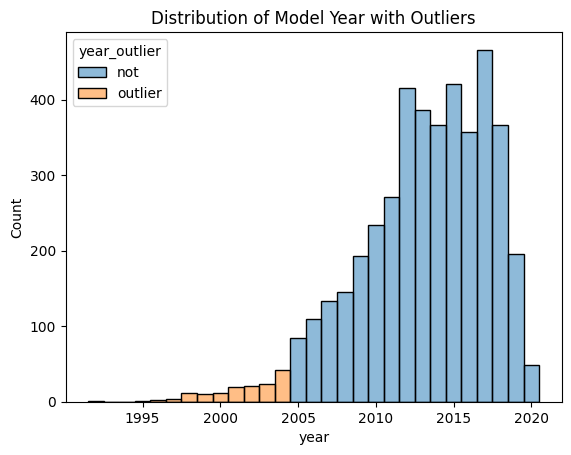

In [14]:
df["year_outlier"] = (df["year"] <= 2004).map({True: "outlier",False: "not"})
p = sns.histplot(data=df,x="year",binwidth=1, binrange=(1991.5,2020.5), hue = "year_outlier")
trash = p.set_title("Distribution of Model Year with Outliers")

### Year -- Model Trend

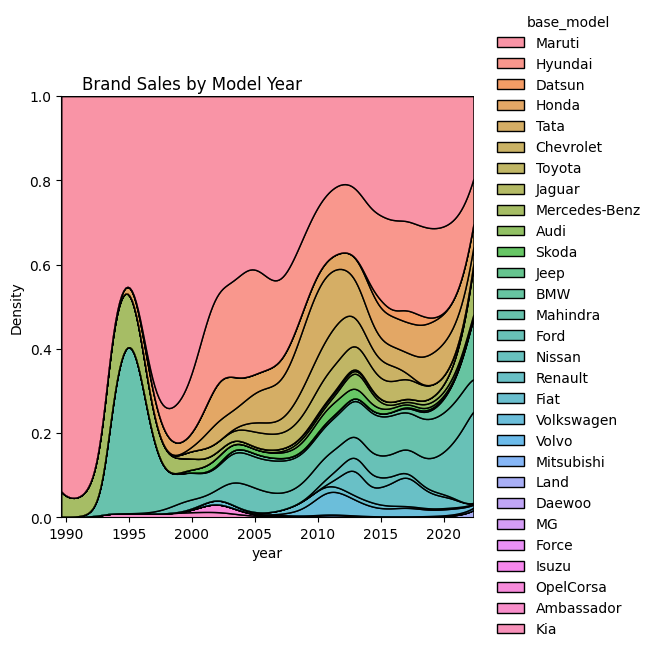

In [15]:
p = sns.displot(data=df,x="year",hue="base_model", kind = "kde", multiple = "fill", clip = (0,None), warn_singular = False)
trash = p.figure.suptitle("Brand Sales by Model Year", x = 0.3, y=1)

By plotting the base model sales against the year variable, we can see that from *older* model years there have been a huge proportion of Maruti cars sold, whereas the sales among *newer* model years are more evenly distributed across the different brands. 

# Exploring the "km_driven" Variable

The "km_driven" (kilometers driven) variable from this dataset can inform us about multiple things, including:
1. Mean/median of kilometers driven a car has
2. What range of km_driven are most cars today
3. Which car brands on the road have the highest mean km_driven

### Extreme Values
Right away, we can point out some extreme values in this dataset for the km_driven variable.

In [16]:
df.sort_values("km_driven", ascending=False).head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,price_usd,base_model,year_outlier
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner,3000.0,Maruti,not
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,7980.0,Maruti,not
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,7980.0,Maruti,not
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner,4800.0,Toyota,not
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner,4200.0,Toyota,not


The above is the dataset sorted from highest to lowest for km_driven. One vehicle has been driven for nearly 250,000 kilometers more than the next highest value of 560,000. The two vehicles at 560,000 km are 160,000 km higher than the next vehicle, then the data begins to come together.

In [17]:
no_km_outliers_df = df.sort_values("km_driven", ascending=False).iloc[3:]

### Center & Spread

In [18]:
print("Mean kilometers driven for cars in the dataset: ", df.km_driven.mean())
print("Median kilometers driven for cars in the dataset: ", df.km_driven.median())
print("Mode kilometers driven for cars in the dataset: ", df.km_driven.mode()[0])
print("Range of kilometers driven: ", df.km_driven.max() - df.km_driven.min())

Mean kilometers driven for cars in the dataset:  66215.77741935484
Median kilometers driven for cars in the dataset:  60000.0
Mode kilometers driven for cars in the dataset:  70000
Range of kilometers driven:  806598


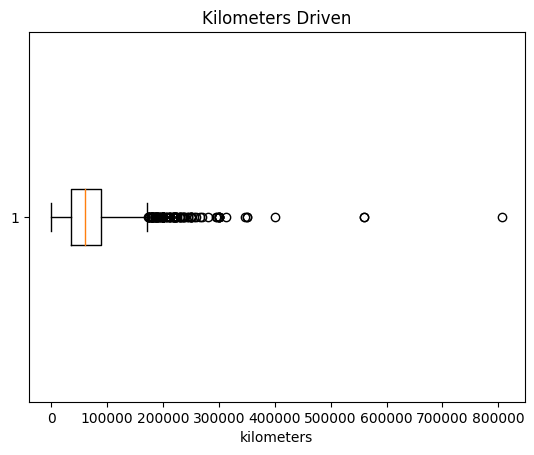

In [19]:
plt.boxplot(df.km_driven, vert=0)
_ = plt.title("Kilometers Driven")
_ = plt.xlabel("kilometers")

In [20]:
Q3 = np.quantile(df.km_driven, 0.75)
Q1 = np.quantile(df.km_driven, 0.25)
IQR = Q3 - Q1
print("Interquartile Range for KM Driven: ", IQR)

Interquartile Range for KM Driven:  55000.0


### Skew & Cluster/Modality

Standard Deviation for KM Driven:  46644.102193620885
Variance of KM Driven:  2175672269.448949


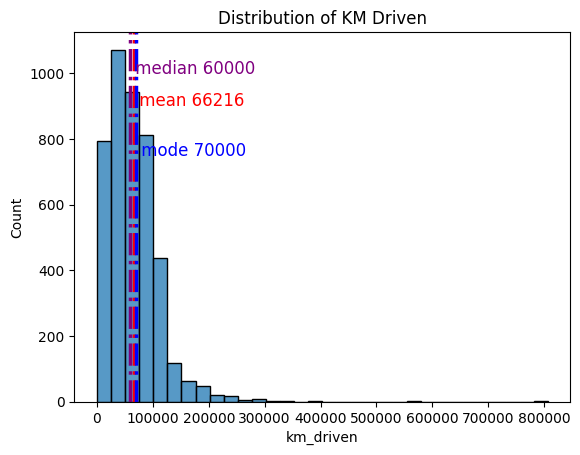

In [21]:
km_median = df.km_driven.median()
km_mean = df.km_driven.mean()
km_mode = df.km_driven.mode()[0]
km_histo = sns.histplot(data=df, x="km_driven", binwidth=25000)
km_histo.set_title("Distribution of KM Driven")
plt.axvline(km_median, c="purple", lw=2.5, ls ='-.')
plt.text(km_median, 1000 ," median " + str(round(km_median)),c="purple", fontsize=12)
plt.axvline(km_mean, c="red", lw=2.5, ls ='-.')
plt.text(km_mean, 900 ," mean " + str(round(km_mean)), c="red", fontsize=12)
plt.axvline(km_mode, c="blue", lw=2.5, ls ='-.')
plt.text(km_mode, 750 ," mode " + str(round(km_mode)), c="blue", fontsize=12)
print("Standard Deviation for KM Driven: ", df.km_driven.std())
print("Variance of KM Driven: ", df.km_driven.var())

The data for km_driven is highly sweked to the right, with a majority of values being at the left of the histogram. Of the bins in the histogram above the one with the highest number of cars is the km range of 25,000 to 50,000.

### KM Driven By Brand
An interesting thing to look at would be which brand's vehicles tend to be the ones that can last a large amount of kilometers driven. This is a metric often used to measure the reliability of a vehicle. Let's look at the top 25% of values in the km_driven and find the brands with the highest mean km_driven.

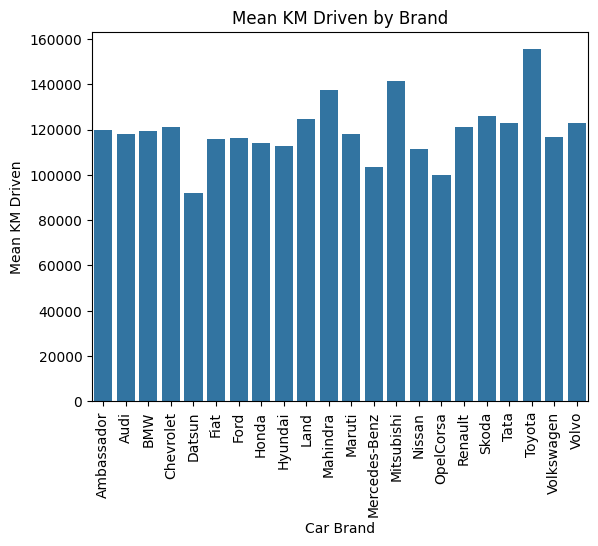

In [22]:
q75 = df.km_driven.quantile(q=0.75)
q75_km_driven = df[df.km_driven.ge(q75)]
q75_km_driven_by_brand = q75_km_driven[["base_model", "km_driven"]]
brand_means = q75_km_driven_by_brand.groupby("base_model").mean().reset_index()
bar_chart = sns.barplot(x=brand_means.base_model, y=brand_means.km_driven)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Car Brand")
_ = plt.ylabel("Mean KM Driven")
_ = plt.title("Mean KM Driven by Brand")


Of the cars in the dataset with the most miles driven, it look that Toyota, Mitsubishi, and Mahindra are the three brands that average the highest kilometers driven.

# Exploring Price USD

This variable was initially listed in the Indian ruppe but I took the liberty of converting it to USD. Seeing car prices listed in millions of dollars was strange, I had no frame of reference for extreme values. After converting, it was easier to recognize extreme values. 

### Initial details/Center
The average car price was \\$6,049 while the median value was \\$4,200 and the mode value \\$3600. The most expensive car was \\$106800 and the cheapest \\$240.  
The fact that the average car price is greater than the median indicates a skew in the right direction. The high standard deviation in price suggests that the value are not clustered together very closely.

In [23]:
df.price_usd

0         720.000
1        1620.000
2        7200.000
3        3000.000
4        5400.000
          ...    
4335     4919.988
4336     4919.988
4337     1320.000
4338    10380.000
4339     2700.000
Name: price_usd, Length: 4340, dtype: float64

In [24]:
print("Mean price:", round(df.price_usd.mean(), 2))
print("Median price:", df.price_usd.median())
print("Mode of price:",df.price_usd.mode()[0])
print("Standard Dev:", round(df.price_usd.std(), 2))
print("Max price:", round(df.price_usd.max(), 2))
print("Min price:", round(df.price_usd.min(), 2))
print("Range:", df.price_usd.max() - df.price_usd.min())

Mean price: 6049.53
Median price: 4200.0
Mode of price: 3600.0
Standard Dev: 6942.58
Max price: 106800.0
Min price: 240.0
Range: 106560.0


In [25]:
df.price_usd.value_counts()

price_usd
3600.000     162
3000.000     125
4200.000     122
6600.000     107
7200.000     103
            ... 
25200.000      1
9947.988       1
13428.000      1
8952.000       1
10380.000      1
Name: count, Length: 445, dtype: int64

The interquartile range falls between these two values:

In [26]:
middle_prices = df.price_usd.quantile([0.25,0.75])
middle_prices

0.25    2504.997
0.75    7200.000
Name: price_usd, dtype: float64

### Skew/Spread
With the plots below we can confirm that there is positive (right) skew in the price data. This makes sense, as price will never drop below zero and thus can only grow to extreme degrees.

ModuleNotFoundError: No module named 'scipy'

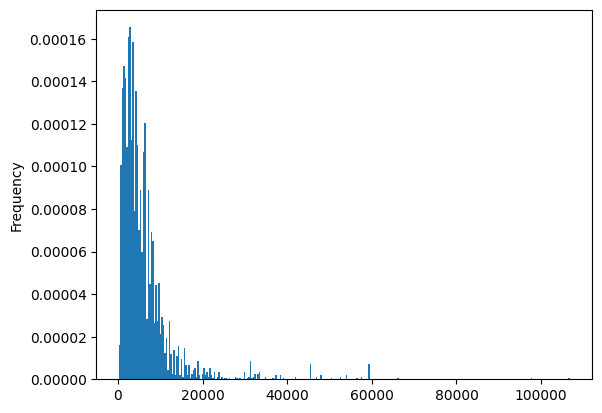

In [27]:
plt.ticklabel_format(style='plain')
ax = df.price_usd.plot.hist(bins=300, density=True, label='Price $USD')
df.price_usd.plot.density(ax=ax, label='Density')
ax.set_xlim([-10, 80000])
ax.axvline(df.price_usd.mean(), c="red", label='Mean')
ax.axvline(df.price_usd.median(), c="green", label='Median')
ax.axvline(df.price_usd.mode()[0], c="black", label='Mode')
plt.legend(loc="upper right")

### Same graph as above but restricted to the middle 50%.

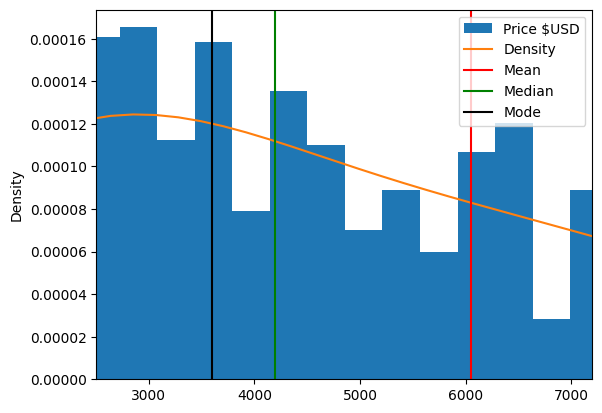

In [ ]:
plt.ticklabel_format(style='plain')
ax = df.price_usd.plot.hist(bins=300, density=True, label='Price $USD')
df.price_usd.plot.density(ax=ax, label='Density')
ax.set_xlim(middle_prices.to_list())
ax.axvline(df.price_usd.mean(), c="red", label='Mean')
ax.axvline(df.price_usd.median(), c="green", label='Median')
ax.axvline(df.price_usd.mode()[0], c="black", label='Mode')
plt.legend(loc="upper right")

<Axes: >

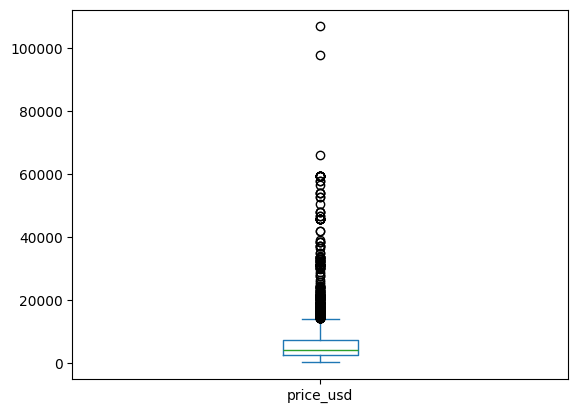

In [ ]:
df.price_usd.plot.box()

### Clusters
## Distribution of car prices in USD by car model
From the plot below, we can see that most of the extreme prices from the data set can be attributed to a select number of model types. Audi, Mercedez & BMW are being sold for the highest prices. Most other cars are typically sold for < $30k. 

<Axes: title={'center': 'price_usd'}, xlabel='base_model'>

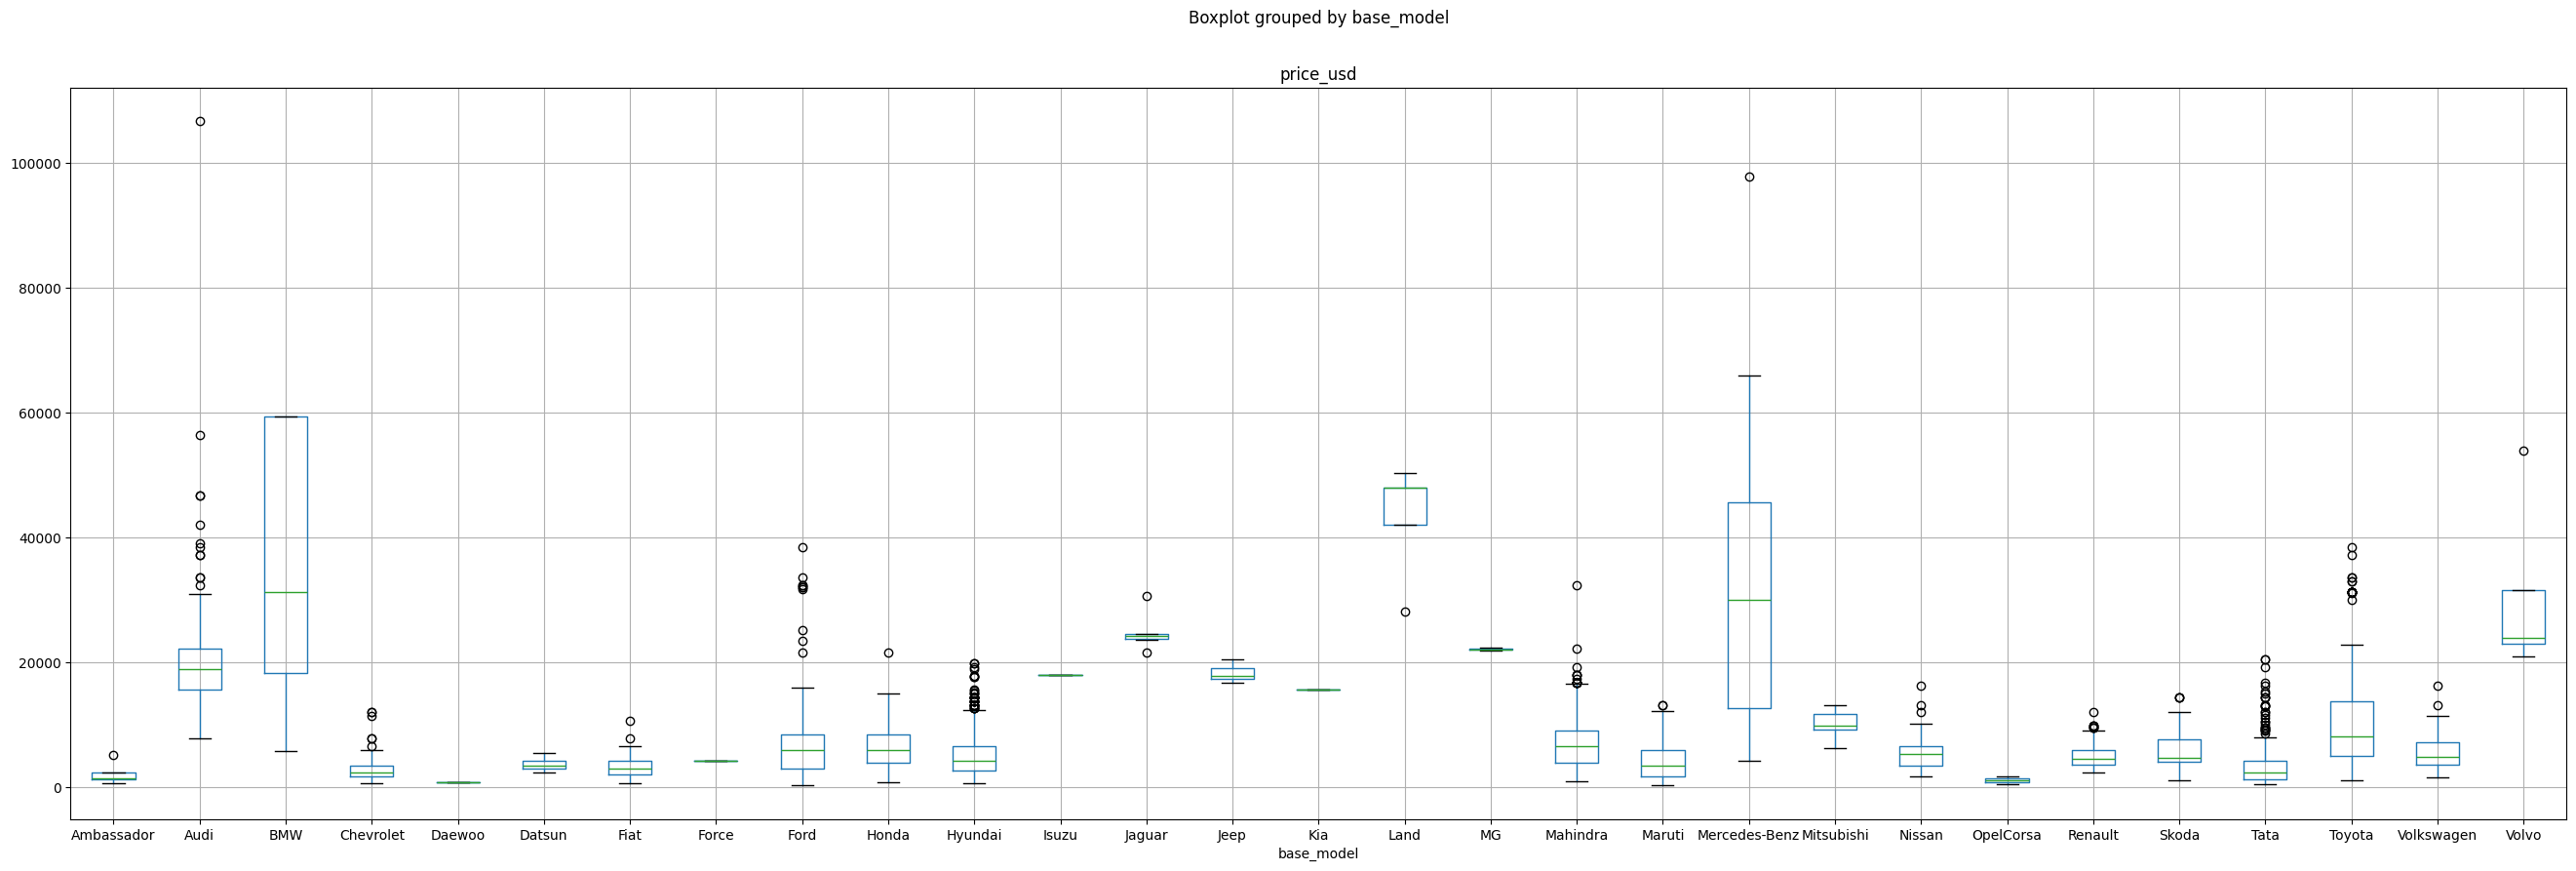

In [ ]:
df.boxplot(by='base_model', column='price_usd', figsize=(32,10))

# Association between price and year
In the below cell, after filtering to the middle 50%, we can observe a trend in the car prices by year. As year grows, the car price tends to go up. This makes sense intuitively, as new cars are typically more expensive than older cars or older models.

<Axes: xlabel='year', ylabel='price_usd'>

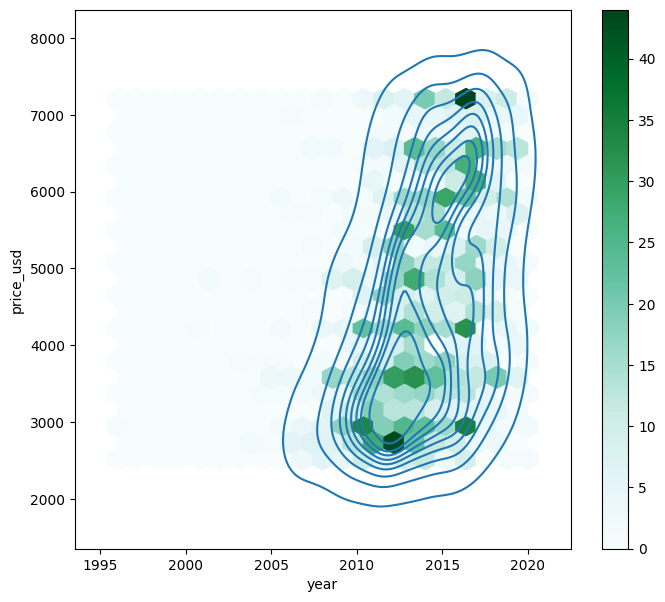

In [ ]:
df_filtered_price = df[df.price_usd.between(middle_prices[0.25], middle_prices[0.75], inclusive='both')]
ax = df_filtered_price.plot.hexbin(x='year', y='price_usd', gridsize=20, figsize=(8,7))
sns.kdeplot(data=df_filtered_price, x='year', y='price_usd')

In [ ]:
df[["year", "price_usd"]].corr()

,year,price_usd
year,1.000000,0.413922
price_usd,0.413922,1.000000


# Exploring Owner
From the cell below we can see there are 5 categories for the owner variable. This data set must consist of sales of used cars, or data post sale, as there is no 0th owner or no-owner cars. Further, 'first owner' dominates the data, occuring 2832 times out of 4340 rows. 'second owner' and 'third owner' have a small presence but 'fourth and above' and 'test' are not present to any significant degree.

In [ ]:
df.owner.describe()

count            4340
unique              5
top       First Owner
freq             2832
Name: owner, dtype: object

In [ ]:
df.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

<Axes: xlabel='owner'>

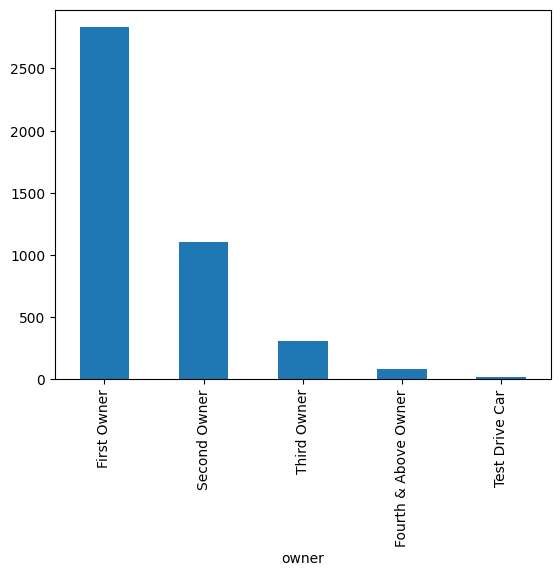

In [ ]:
df.owner.value_counts().plot.bar()

The distribution of owners remains predominantly grouped in 'first owner'even when analyzed on the middle 50% of price cars.

<Axes: xlabel='owner'>

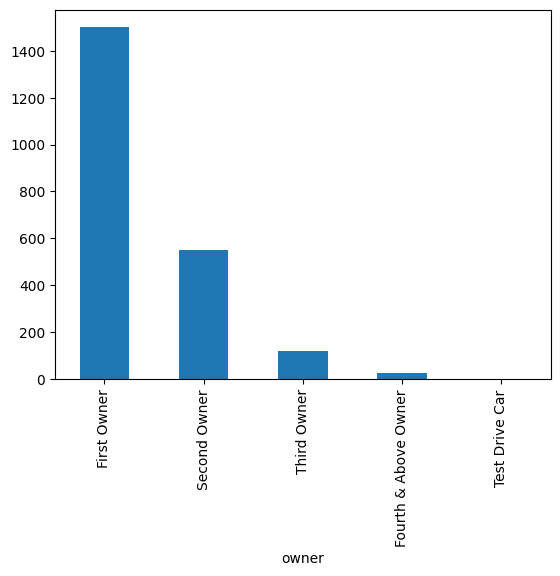

In [ ]:
df_filtered_price.owner.value_counts().plot.bar()

Here we can see that later owner cars tend to have more km_driven. The median and range increases as owner does. 

<Axes: title={'center': 'price_usd'}, xlabel='owner'>

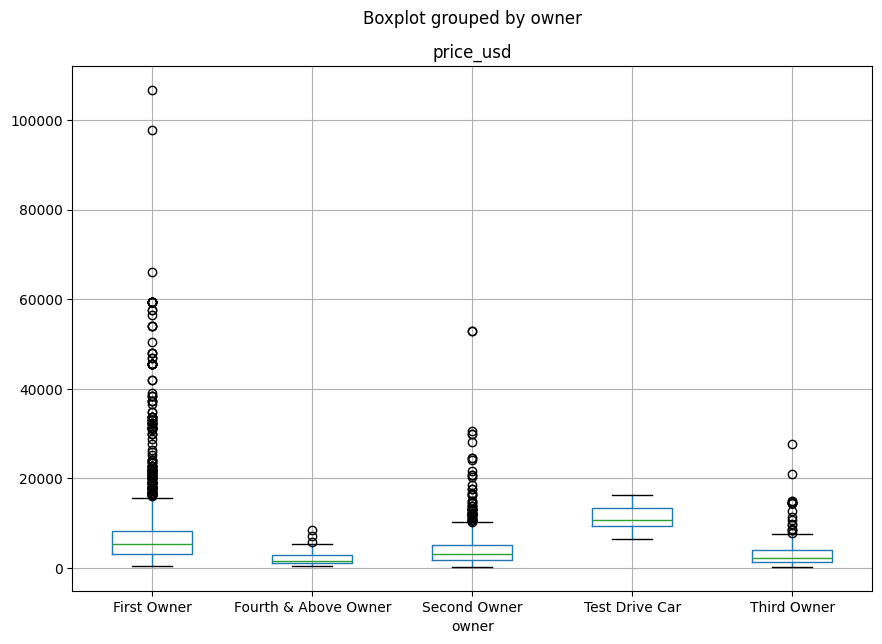

In [ ]:
df.boxplot(by='owner', column='price_usd', figsize=(10,7))

<Axes: title={'center': 'price_usd'}, xlabel='owner'>

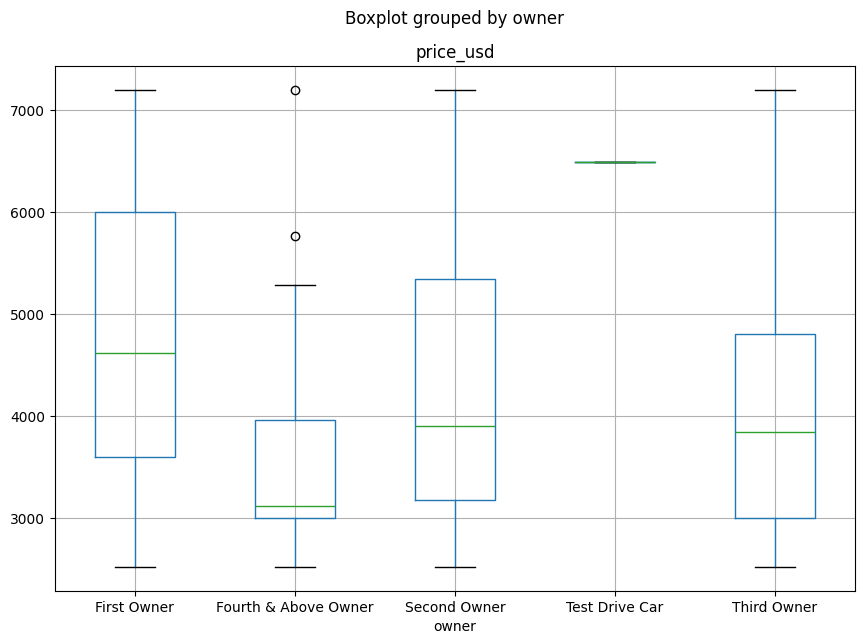

In [ ]:
df_filtered_price.boxplot(by='owner', column='price_usd', figsize=(10,7))

<Axes: title={'center': 'km_driven'}, xlabel='owner'>

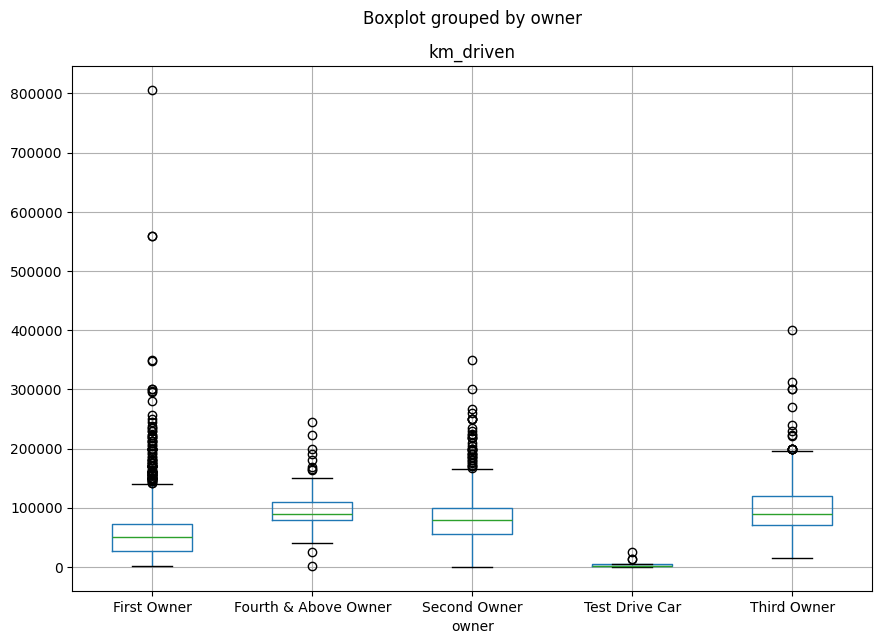

In [ ]:
df.boxplot(by='owner', column='km_driven', figsize=(10,7))

Here we can see that later owner cars tend to have more km_driven. The median and range increases as owner does. 


# Exploring Fuel Variable
### Finding the Center, Spread, Skew, Clusters, and Extreme Values of the fuel variable

Because this data is categorical, some of these aspects don't apply in the same way. The initial analysis can be found below:



### Finding the Center

To find the center for this data, we can look at the most common occurence. Accross the entire population of cars in the data set, the most common fuel required is Diesel as can be seen above


In [ ]:
center = df['fuel'].mode()
print('Center:', center)

Center: 0    Diesel
Name: fuel, dtype: object



### Spread, Clusters, and Extreme Values

There are 5 unique fuel types that exist in this data set, but almost 99% of cars have either Diesel or Petrol.

The rest of the fuel types make up less than 1% each, with Electric haveing only 1 car repesented in this data set.


In [ ]:
fule_counts = df['fuel'].nunique()
print('Fuel Counts:', fule_counts)

Fuel Counts: 5


<Axes: ylabel='count'>

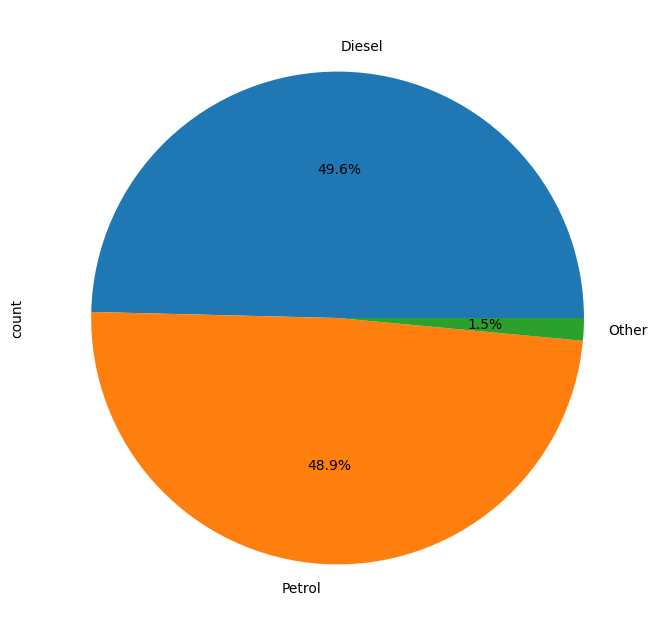

In [ ]:
threshold = 0.05

fuel_percentages = df['fuel'].value_counts(normalize=True)

small_categories = fuel_percentages[fuel_percentages < threshold].index

# Replace small categories with 'Other'
df['fuel_adjusted'] = df['fuel'].replace(small_categories, 'Other')

# Plot the adjusted fuel types
fuel_counts_adjusted = df['fuel_adjusted'].value_counts()
fuel_counts_adjusted.plot(kind='pie', figsize=(12, 8), autopct='%1.1f%%')

In [ ]:
extreme_values = df['fuel'].value_counts().sort_values()
print('Extreme Values:\n', extreme_values)

Extreme Values:
 fuel
Electric       1
LPG           23
CNG           40
Petrol      2123
Diesel      2153
Name: count, dtype: int64



### Analysis of Fuel over time

Though Diesel is the most common fuel type, this seems to have changed relatively recently.

Prior to 2011 the most common fuel type of cars being sold was Petrol,


<Axes: xlabel='year'>

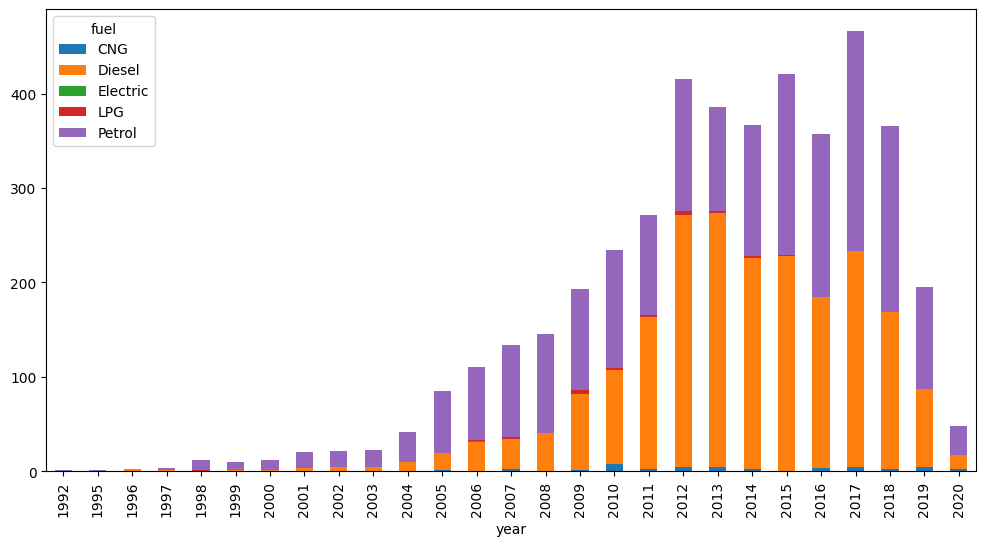

In [ ]:
fuel_year_breakdown = df.groupby(['year', 'fuel']).size().unstack()
fuel_year_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))


### Analysis of Fuel by Brand

The most common brands (Maruti and Hyundai) have been mostly Petrol cars, but the rest of the brands are much more likely to be Diesel.


<Axes: xlabel='base_model'>

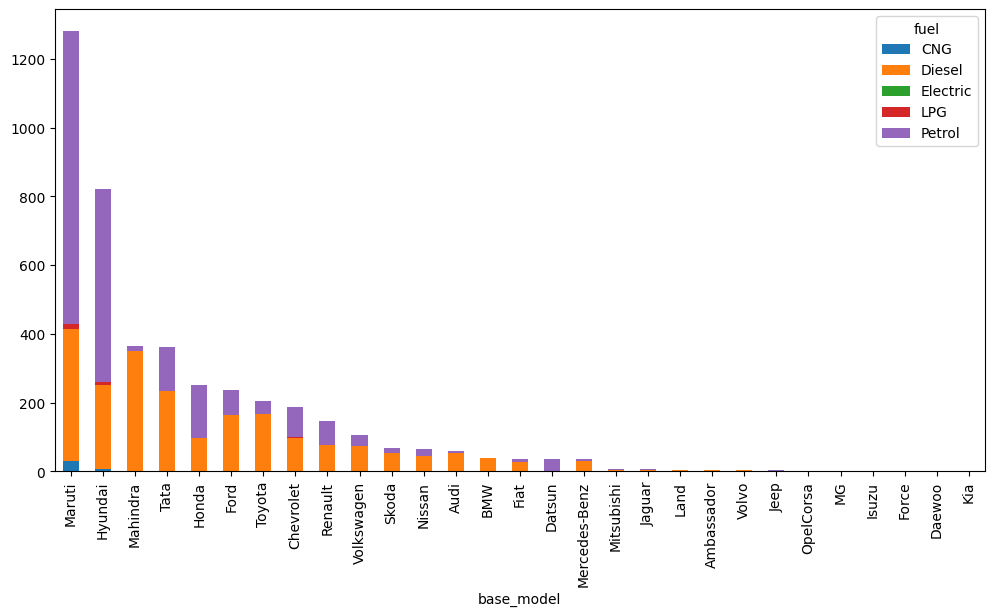

In [ ]:
fuel_model_breakdown = df.groupby(['base_model', 'fuel']).size().unstack()

fuel_model_breakdown['total'] = fuel_model_breakdown.sum(axis=1)

fuel_model_breakdown = fuel_model_breakdown.sort_values('total', ascending=False)

fuel_model_breakdown = fuel_model_breakdown.drop(columns=['total'])

fuel_model_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))


## Evaluating extreme values by brand

When removing both Diesel and Petrol from the data set, we can see what brands are represented for our extreme values. What can be seen is that Maruti and Hyundai represent the majority of our extreme values, and that Toyata is the only brand that has sold an electric car.


<Axes: xlabel='base_model'>

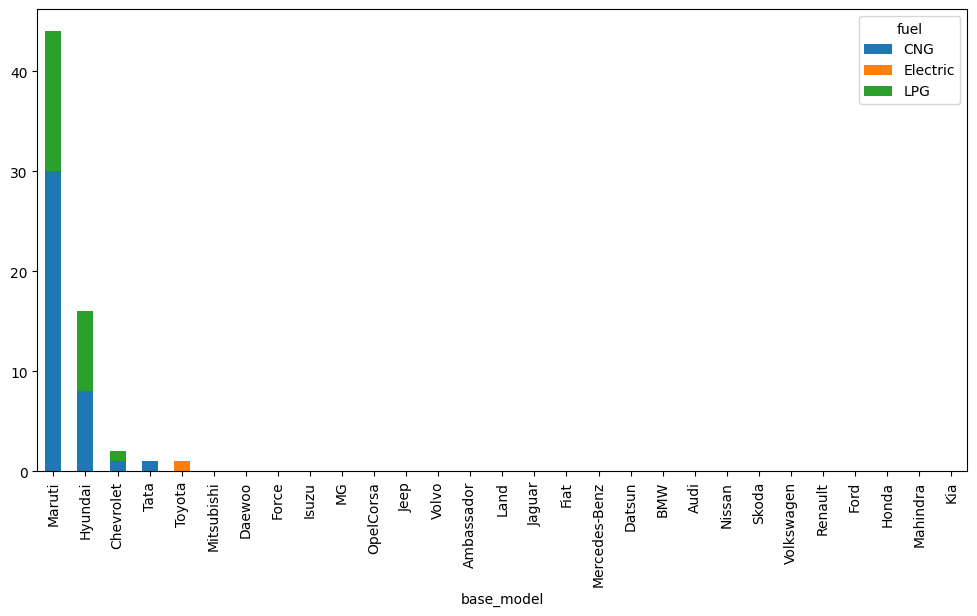

In [ ]:
fuel_model_breakdown_without_D_and_P = fuel_model_breakdown.drop(columns=['Diesel', 'Petrol'])

fuel_model_breakdown_without_D_and_P['total'] = fuel_model_breakdown_without_D_and_P.sum(axis=1)

fuel_model_breakdown_without_D_and_P = fuel_model_breakdown_without_D_and_P.sort_values('total', ascending=False)

fuel_model_breakdown_without_D_and_P = fuel_model_breakdown_without_D_and_P.drop(columns=['total'])

fuel_model_breakdown_without_D_and_P.plot(kind='bar', stacked=True, figsize=(12, 6))

# Exploring Car Name & Model
The dataset give a car "name" variable that includes the make & model. We have created an additional column, "base_model" that will give us just the brand name for each vehicle in the dataset.

In [43]:
brands = df.base_model.unique()
models = df.name.unique()
print("There are a total of " + str(len(brands)) + " brands in the dataset")
print("There are a total of " + str(len(names)) + " models in the dataset\n")
print("*** Top 5 most popular brands ***")
print(df.base_model.value_counts().head())
print("\n*** Top 5 most popular models ***")
print(df.name.value_counts().head())

There are a total of 29 brands in the dataset
There are a total of 1491 models in the dataset

*** Top 5 most popular brands ***
base_model
Maruti      1280
Hyundai      821
Mahindra     365
Tata         361
Honda        252
Name: count, dtype: int64

*** Top 5 most popular models ***
name
Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: count, dtype: int64


Maruti and Hyundai are by far the most popular brand, as well as Maruti having the top 4 most popular models.

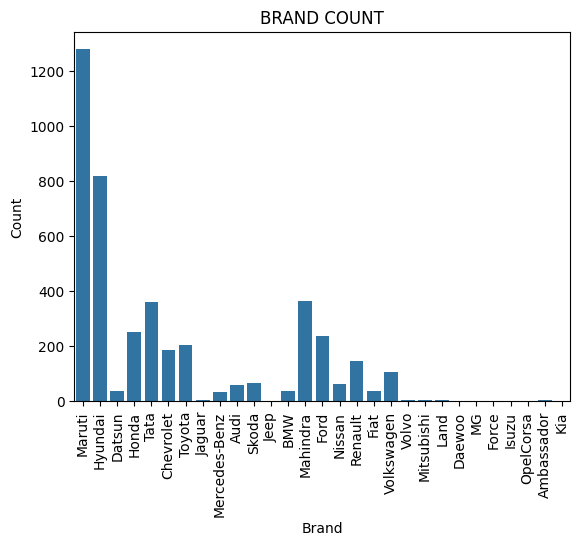

In [53]:
sns.countplot(data=df,x="base_model")
plt.xticks(rotation=90)
plt.xlabel("Brand",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("BRAND COUNT")
plt.show()

<Axes: title={'center': 'Top Brands By Year'}, xlabel='year'>

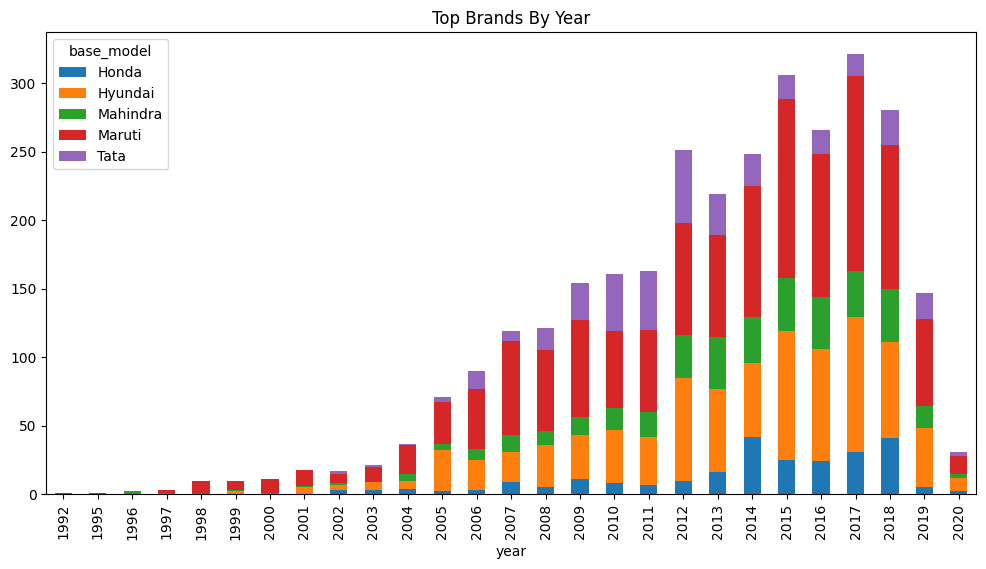

In [67]:
is_maruti = df.base_model == "Maruti"
is_hyundai = df.base_model == "Hyundai"
is_tata = df.base_model == "Tata"
is_mahindra = df.base_model == "Mahindra"
is_honda = df.base_model == "Honda"
popular_brands_df = df[is_maruti | is_mahindra | is_tata | is_hyundai | is_honda]
brands_year = popular_brands_df.groupby(['year', 'base_model']).size().unstack()
brands_year.plot(kind='bar', stacked=True, figsize=(12, 6), title="Top Brands By Year")

The popularity of the top brands has remained relatively steady year over year, with Maruti and Hyundai consistently being the top brands each year.